In [15]:
library(isdals)
library(ppcor)

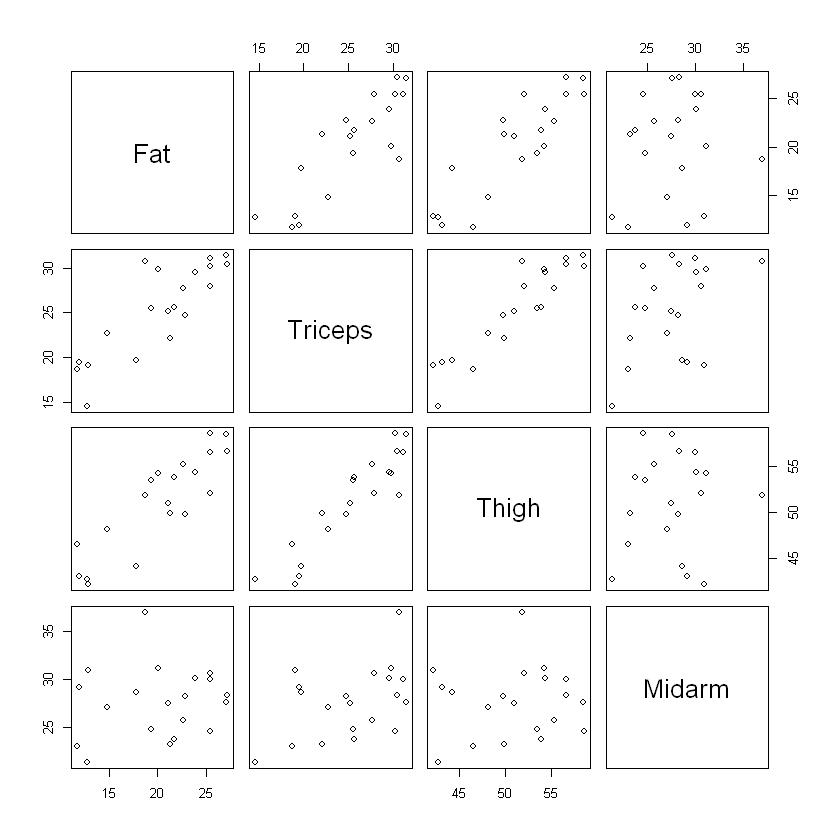

In [2]:
data(bodyfat)
attach(bodyfat)
pairs(cbind(Fat, Triceps, Thigh, Midarm))

In [3]:
cor(cbind(Fat, Triceps, Thigh, Midarm))

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


##### Fat and Triceps are highly correlated, r=0.8433. But, so are Fat and Thigh circumference, r= 0.8781. Also, Triceps and Thigh are clearly related r= 0.9238.
##### What is the correlation between Fat and Triceps after controling for Thigh?

In [6]:
Fat.hat = predict(lm(Fat~Thigh))
Triceps.hat = predict(lm(Triceps~Thigh))
cor((Fat- Fat.hat), (Triceps- Triceps.hat))

[1] 0.1749822

##### A large portion of the correlation between Fat and Triceps is accounted for by controlling for Thigh.
##### Now, let's control for both Thigh and Midarm

In [7]:
Fat.hat = predict(lm(Fat~Thigh+Midarm))
Triceps.hat = predict(lm(Triceps~Thigh+Midarm))
cor((Fat- Fat.hat), (Triceps- Triceps.hat))

[1] 0.33815

In [27]:
partialcor <- pcor(bodyfat, method = c("pearson"))
partialcor$estimate

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000


In [13]:
help(pcor)